# Welcome to Telco Customer Churn's notebook for preprocessing
To run all the code, you can use the "run all" function. You can also follow along and run the code accordingly. Note that we assume this project to be running with ***Jupyter Notebook***.

## 1. Dependencies
We have recorded all the required dependencies in `requirements.txt`, to get all the dependencies installed, simply run the below's code.

In [86]:
%pip install -r requirements.txt

Processing /home/conda/feedstock_root/build_artifacts/asttokens_1698341106958/work (from -r requirements.txt (line 1))
ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: '/home/conda/feedstock_root/build_artifacts/asttokens_1698341106958/work'

Note: you may need to restart the kernel to use updated packages.


## 2. Project setup
Below cell imports all the library needed and do some global setting for the dataframes.

In [87]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.options.display.max_rows = 4000
pd.options.display.max_columns = 4000
pd.options.display.max_colwidth = 100

data_root = 'data'

## 3. Reading in data
In this project, we have stored all our data in `data/`. Run the cell below to load the data. The data source can be found in this link: https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data.

In [88]:

data_path = os.path.join(data_root, 'data.csv')
df = pd.read_csv(data_path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 4. Data Preprocessing
This section begins the steps for data preprocessing, including some exploratory data analysis and some data cleaning.

### 4.1. Data Cleaning and Preparations
We start by doing some preliminary exploration of our data to gain some insight of it.

Let's first start by having alook at some information of the columns:

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


From the output, we can see that there is no null value for all the columns, but just to be safe, we also have a look at unique values for each columns:

In [90]:
for column in df.columns:
    print(column, df[column].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

From the output above, it it clear that there is really no missing values. However, there is a few problems:
1. customerID is not a useful column to perform any operation for
2. TotalCharges have wrong representation for value, it should be numerical instead
3. SeniorCitizen should be object instead of int64
4. According to the [new data description](https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113), values such as 'No internet service' and 'No phone service' has been morphed to 'No'.

Let's address these problems.

First, we make a copy of the `df`

In [91]:
# make a copy for df
df_cleaned = df.copy()

We can remove `customerID` from the `df`

In [92]:
# remove customerID
df_cleaned.drop(columns=['customerID'], inplace=True)

Next, we convert `TotalCharge` to numerical datatype.

In [93]:
# convert TotalCharge to numerical
df_cleaned['TotalCharges'] = pd.to_numeric(df_cleaned['TotalCharges'], errors='coerce')

Following that, we map `SeniorCitizen` to "No" and "Yes" to standarize the representation. which make it easier for data exploration and further processing.

In [94]:
# map SeniorCitizen to "No" and "Yes"
df_cleaned['SeniorCitizen'] = df_cleaned['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

Lastly, we morph the redundant value of some columns into 'No'.

In [95]:
df_cleaned['MultipleLines'] = df_cleaned['MultipleLines'].replace('No phone service','No')
df_cleaned['OnlineSecurity'] = df_cleaned['OnlineSecurity'].replace('No internet service','No')
df_cleaned['OnlineBackup'] = df_cleaned['OnlineBackup'].replace('No internet service','No')
df_cleaned['DeviceProtection'] = df_cleaned['DeviceProtection'].replace('No internet service','No')
df_cleaned['TechSupport'] = df_cleaned['TechSupport'].replace('No internet service','No')
df_cleaned['StreamingTV'] = df_cleaned['StreamingTV'].replace('No internet service','No')
df_cleaned['StreamingMovies'] = df_cleaned['StreamingMovies'].replace('No internet service','No')

We can check the values again:

In [96]:
for column in df_cleaned.columns:
    print(column, df_cleaned[column].unique())

gender ['Female' 'Male']
SeniorCitizen ['No' 'Yes']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes']
OnlineBackup ['Yes' 'No']
DeviceProtection ['No' 'Yes']
TechSupport ['No' 'Yes']
StreamingTV ['No' 'Yes']
StreamingMovies ['No' 'Yes']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn ['No' 'Yes']


In [97]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [98]:
df_cleaned.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 4.2. Normalization
For numerical values, we can normalize them and standarize them into the same range, for this project we will be using min-max normalization:

In [101]:
# min-max normalziation with sklearn
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_cleaned['tenure'] = scaler.fit_transform(df_cleaned[['tenure']])
df_cleaned['MonthlyCharges'] = scaler.fit_transform(df_cleaned[['MonthlyCharges']])
df_cleaned['TotalCharges'] = scaler.fit_transform(df_cleaned[['TotalCharges']])

df_cleaned.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,0.013889,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0.115423,0.001275,No
1,Male,No,No,No,0.472222,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0.385075,0.215867,No
2,Male,No,No,No,0.027778,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,0.354229,0.010310,Yes
3,Male,No,No,No,0.625000,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0.239303,0.210241,No
4,Female,No,No,No,0.027778,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.521891,0.015330,Yes


Finally, we save this snapshot of dataset before imbalancing to `data_cleaned_no_rebalance.csv`

In [104]:
# save cleaned data
cleaned_data_path = os.path.join(data_root, 'data_cleaned_no_rebalance.csv')

df_cleaned.to_csv(cleaned_data_path, index=False)

#### 4.2. Imbalance data
For this section, we will be looking into the distribution of category values of `df_cleaned` looking for any data data is overly imbalance, and rebalance them using some oversampling techniques.

Firstly, we look into the distribution of all categorical values:

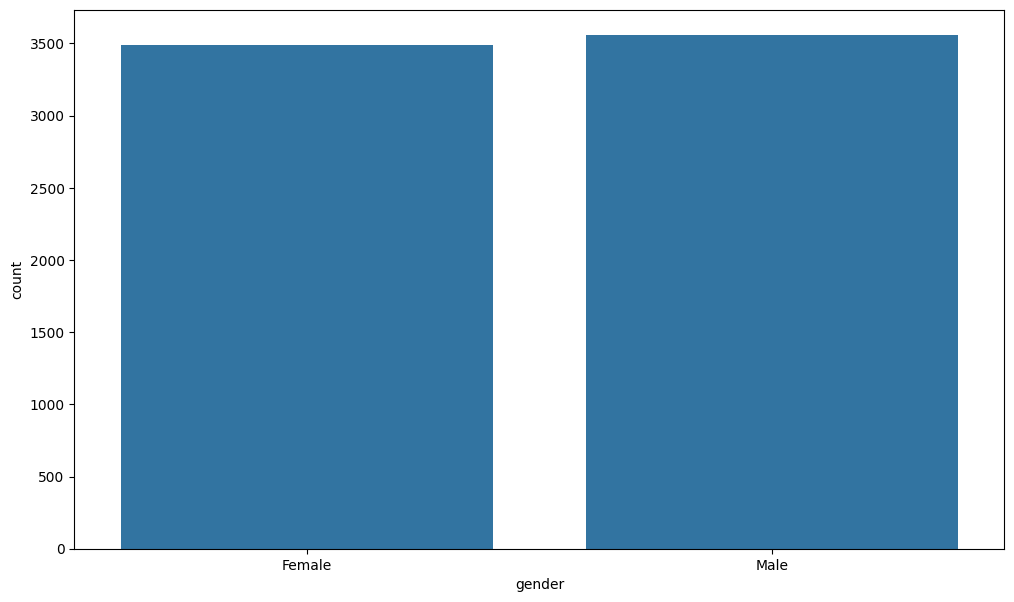

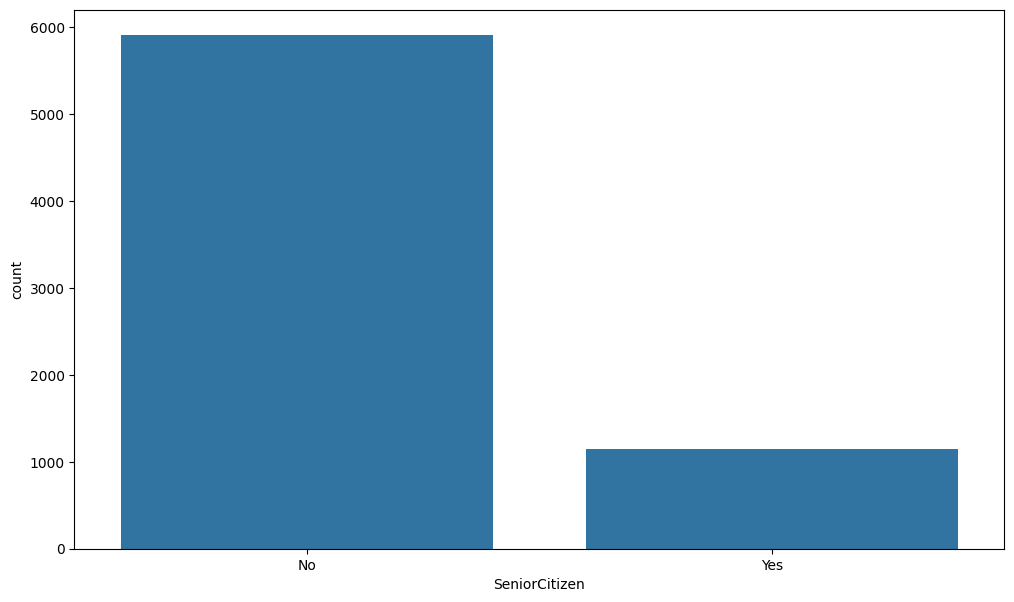

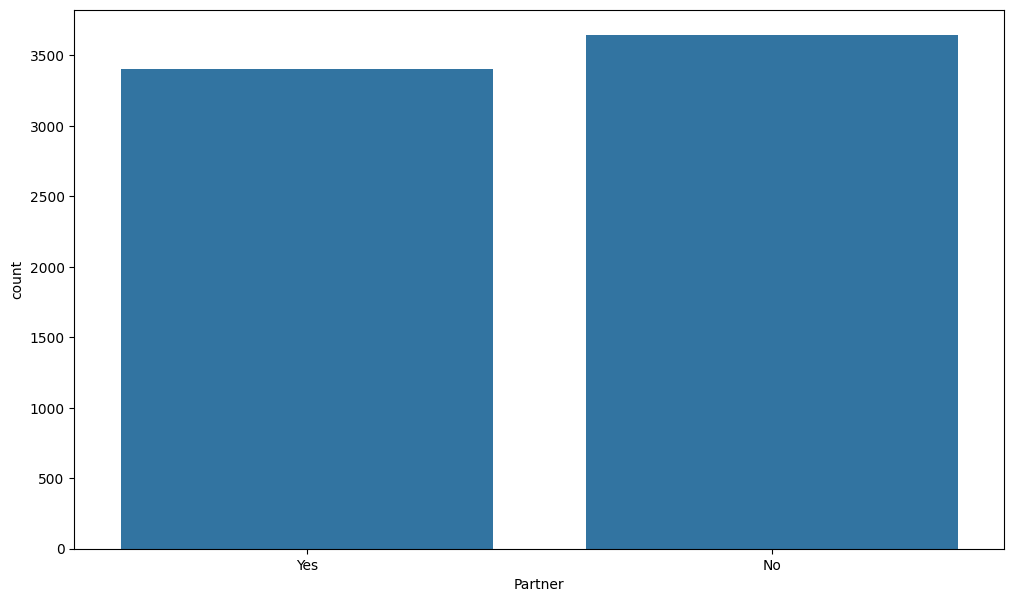

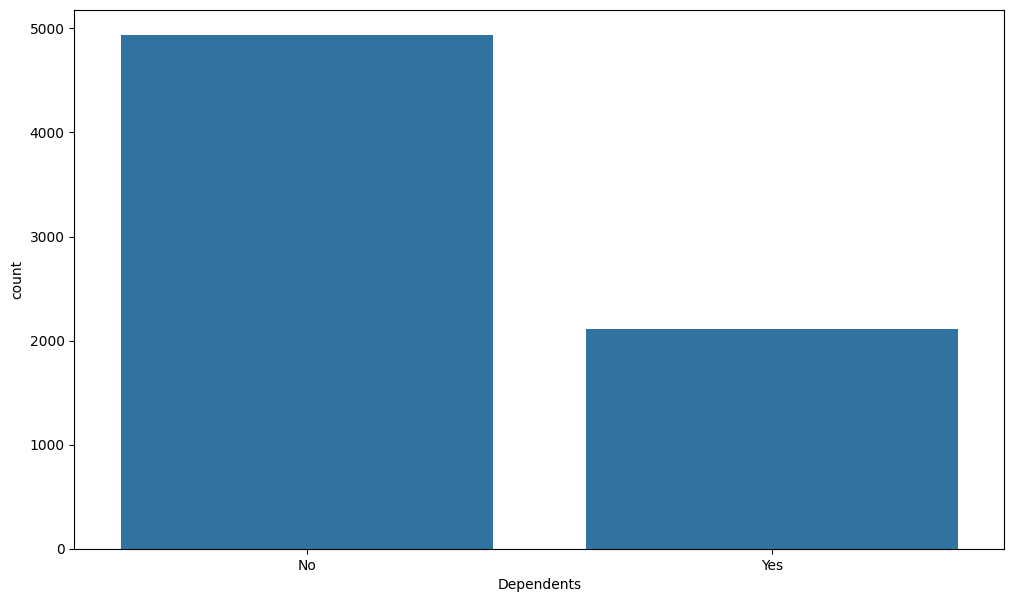

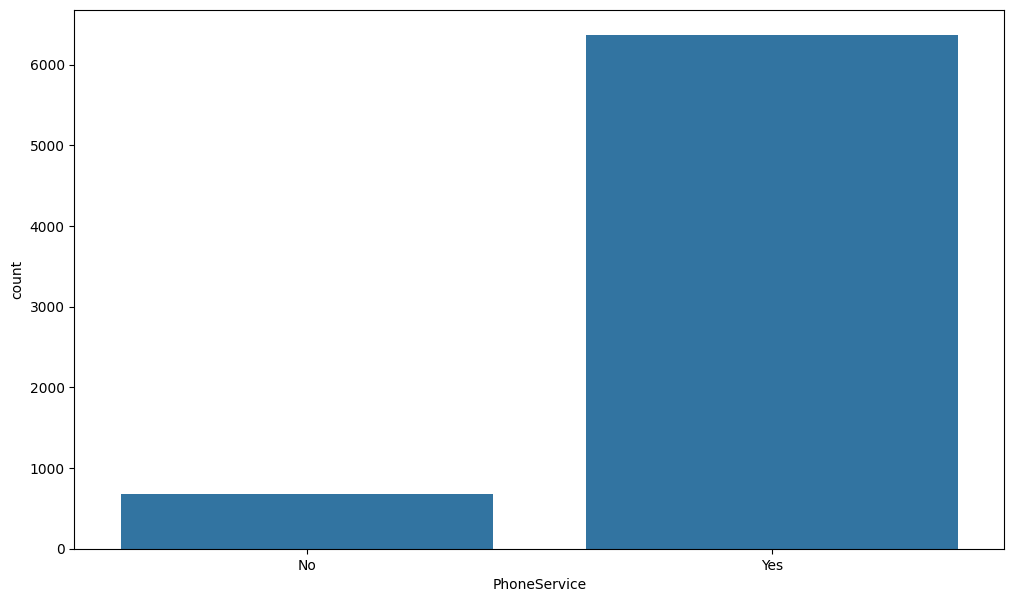

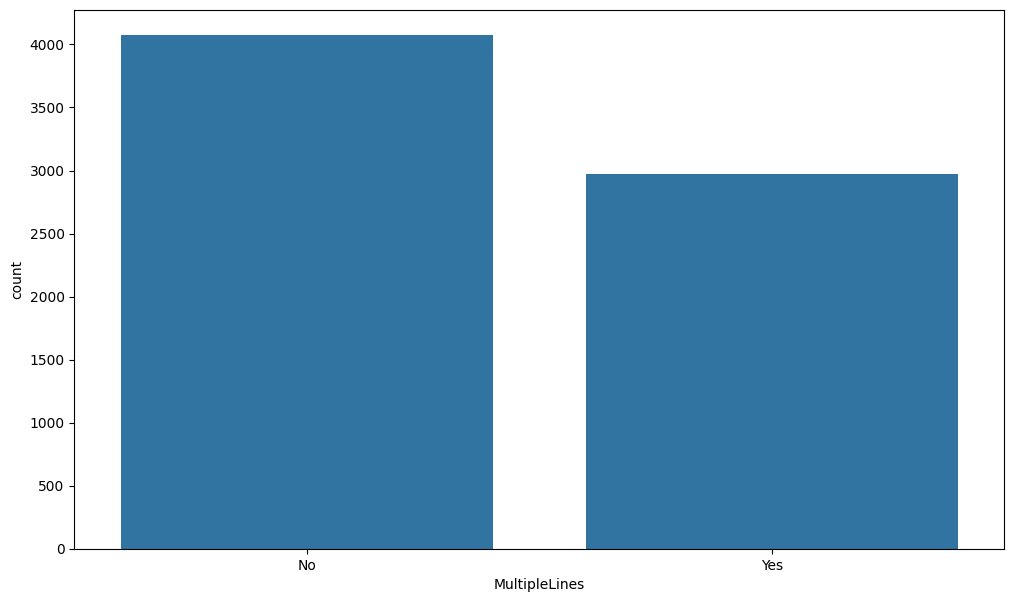

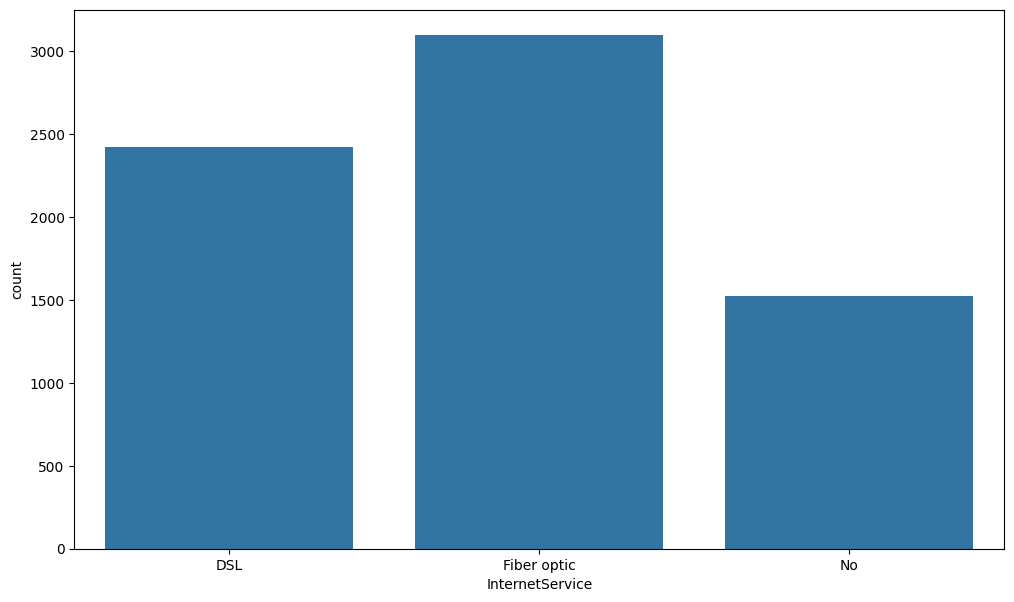

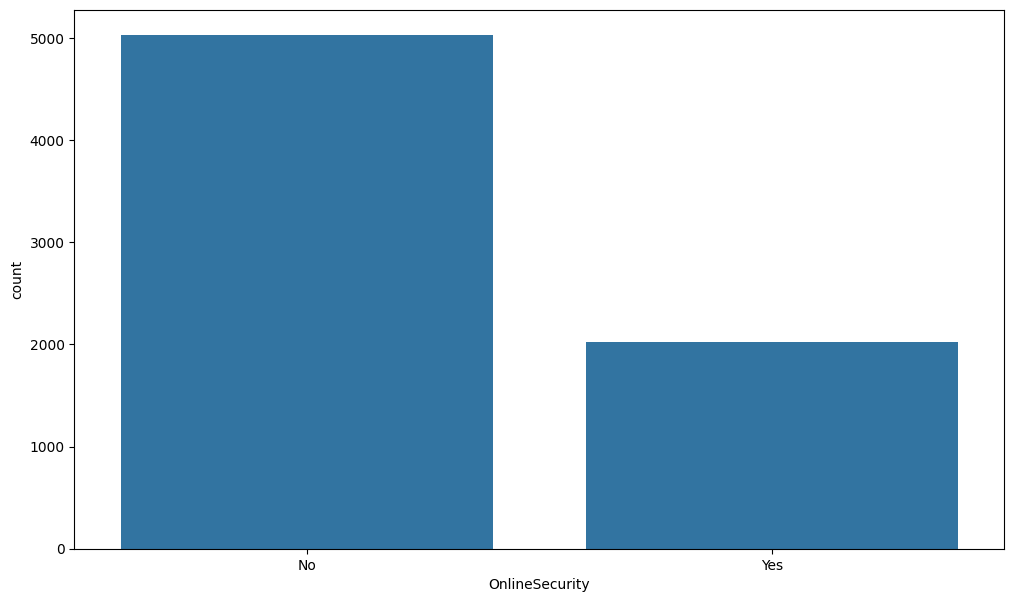

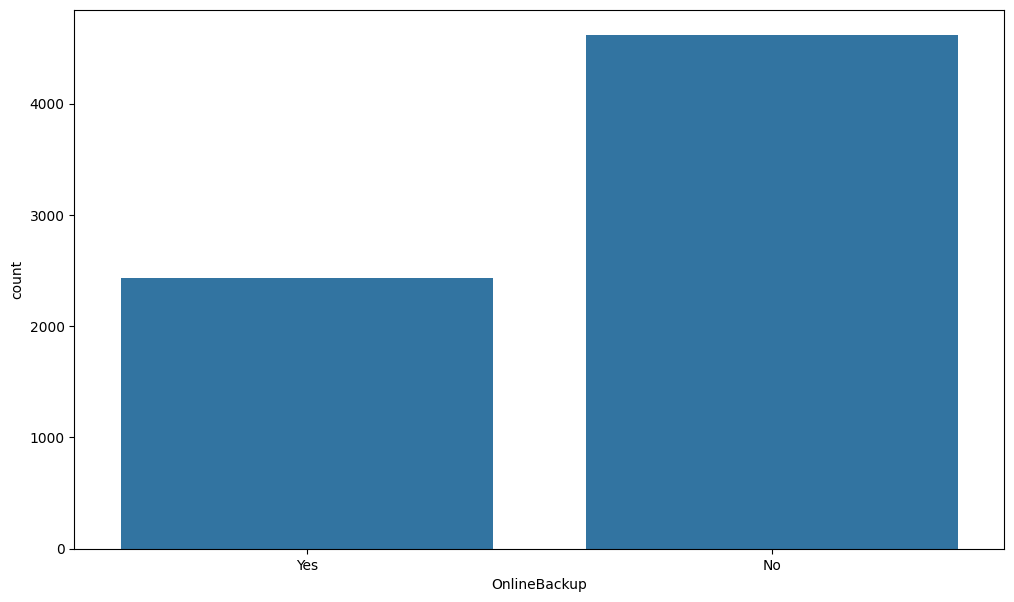

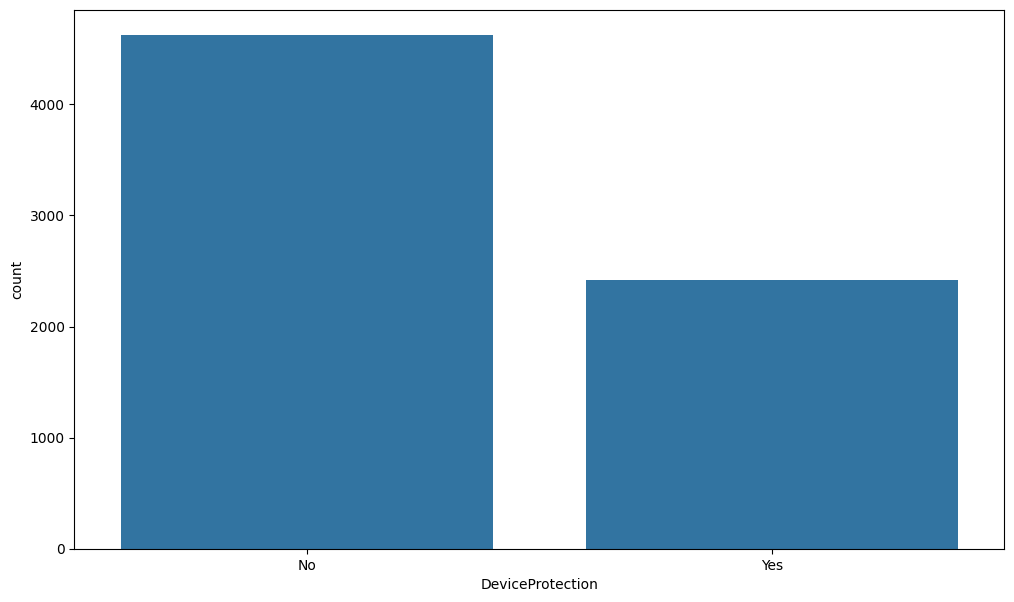

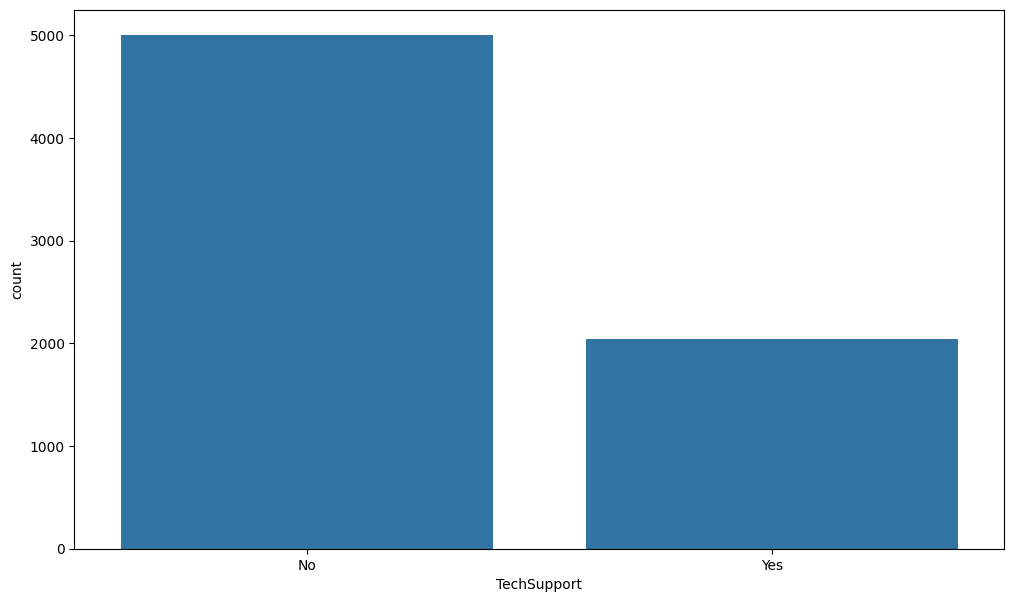

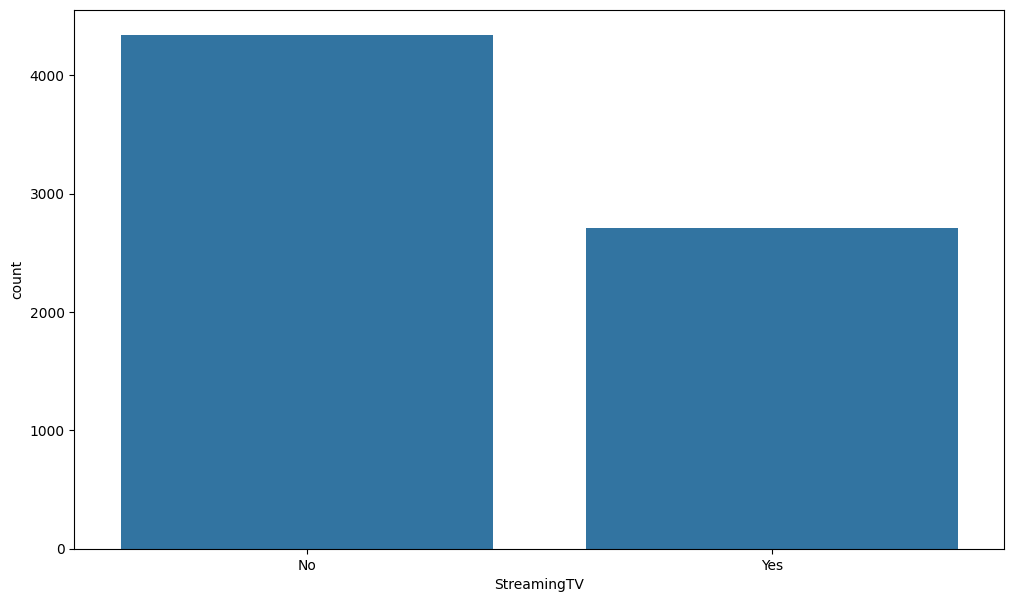

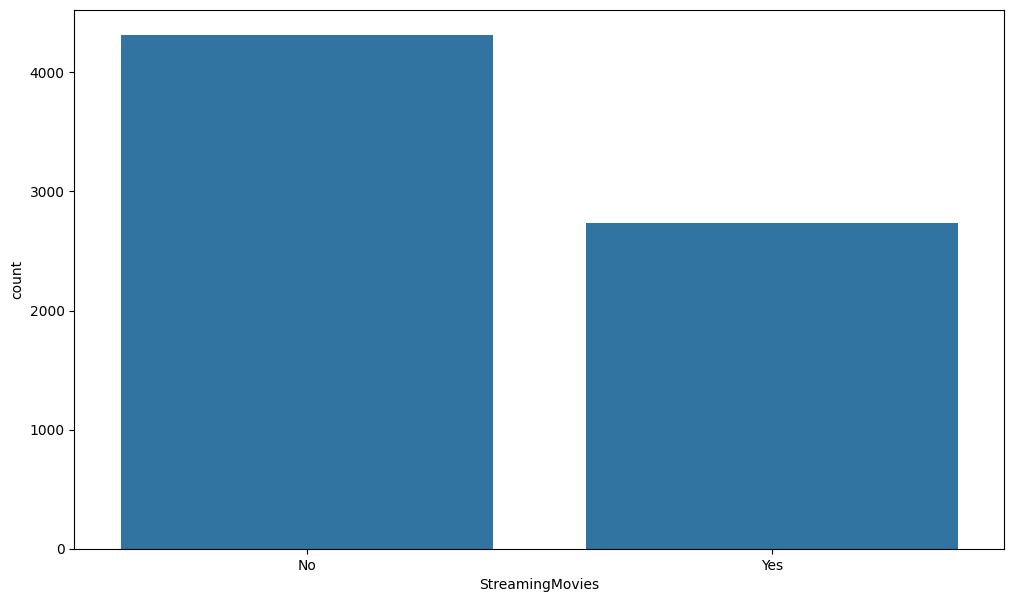

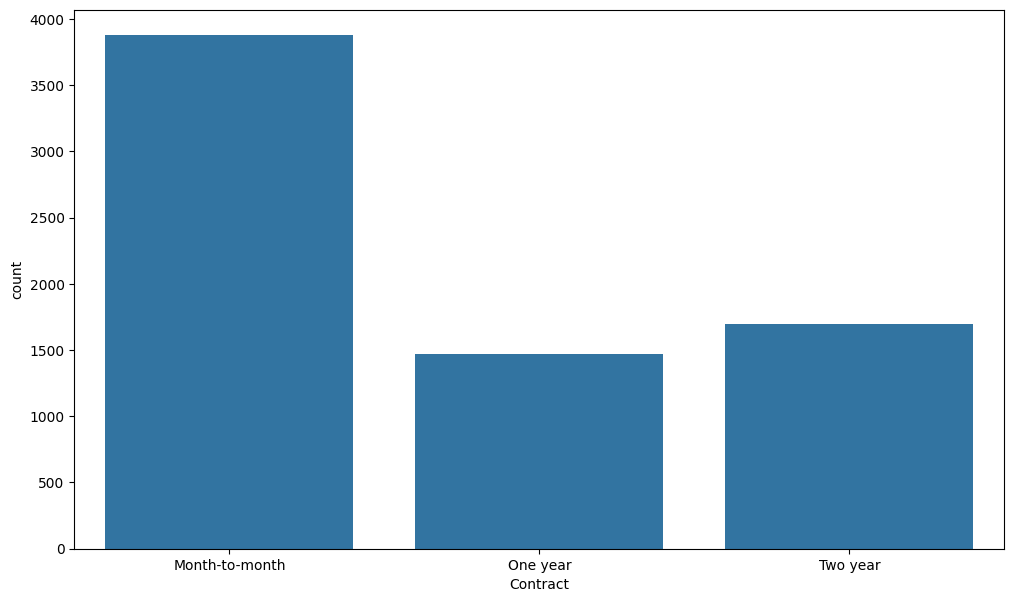

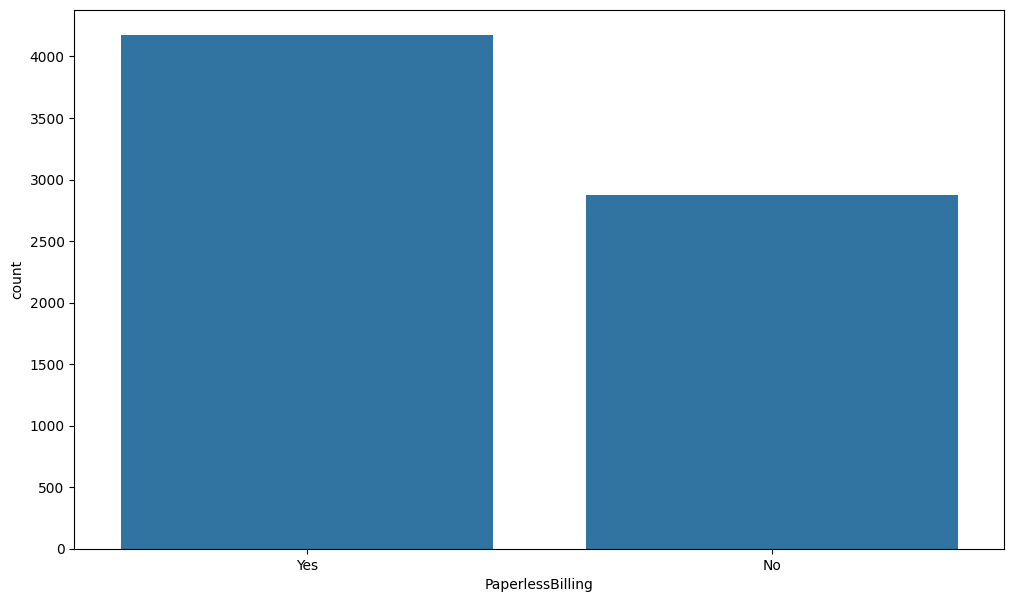

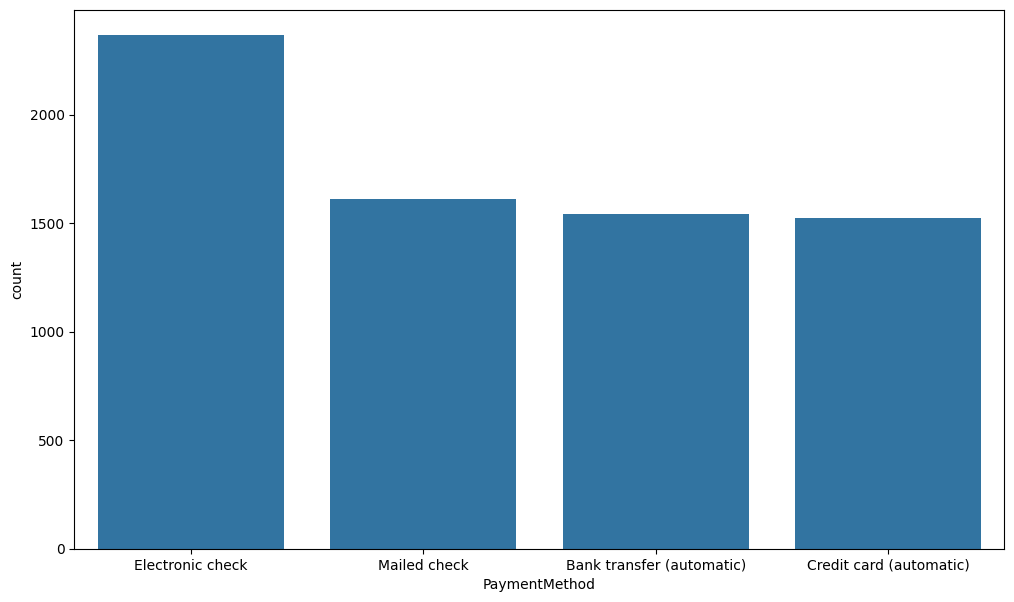

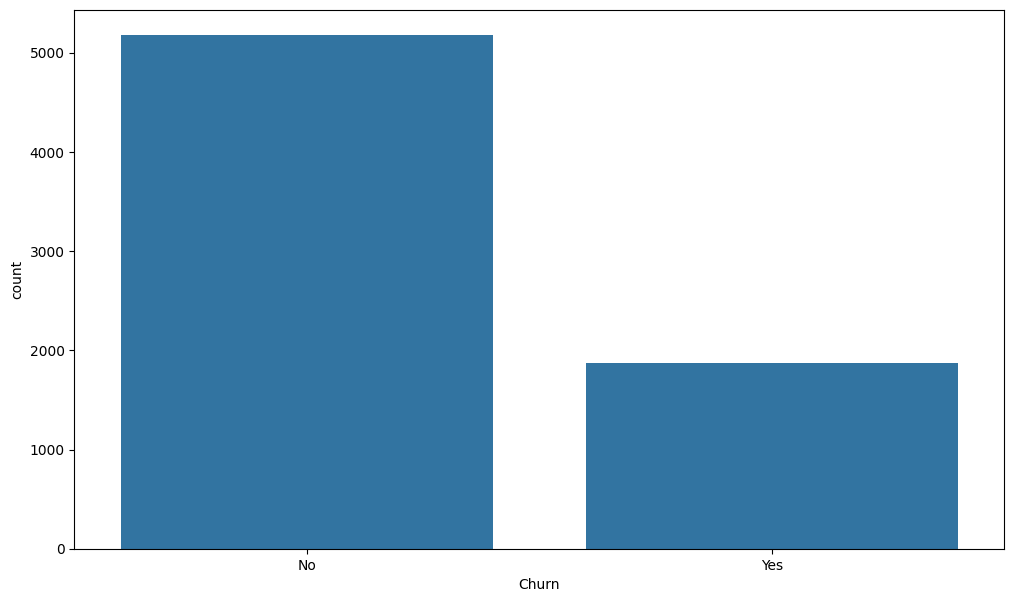

In [99]:
#plot distribution grahps for all categorical variables

non_numeric_columns = df_cleaned.select_dtypes(['object']).columns
for column in non_numeric_columns:
    plt.figure(figsize=(12, 7))
    sns.countplot(x=column, data=df_cleaned)
    plt.show()


In [100]:
# rebalance by oversamping the column of SeniorCitizen and PhoneService to ration of 10:4
df_cleaned['SeniorCitizen'].value_counts()
df_cleaned['PhoneService'].value_counts()





PhoneService
Yes    6361
No      682
Name: count, dtype: int64